In [ ]:
!pip install klib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import klib
import sys
import warnings
warnings.filterwarnings('ignore')
print('All of the libraries loaded')

All of the libraries loaded


In [ ]:
path = r'/content/drive/MyDrive/instagram_insights.csv'
data = pd.read_csv(path, encoding='latin1')
data.head()

,Post ID,Media Type,Product Type,timestamp,Reach,saved,Shares,Total Interactions,Likes,Comments,Caption,Hashtags
0,1.800000e+16,VIDEO,REELS,2025-04-25T13:57:45+0000,417,0,2.0,16.0,14,0,"Breathe, relax, and let go of the day's stress...",#nityafitness4u #celebratingfitnessdaily #yoga...
1,1.790000e+16,VIDEO,REELS,2025-04-20T13:34:47+0000,1041,0,3.0,42.0,36,3,Salsa Bachata class at Nitya Fitness \nFor mor...,#celebratingfitnessdaily #nityafitness4u #myha...
2,1.810000e+16,VIDEO,REELS,2025-04-20T10:44:46+0000,1288,1,6.0,123.0,108,8,Punjabis in the houseâ¦\n\nMere wargiâ¦ Ni l...,#merewarginilabni #merewargitenunhilabhni #cel...
3,1.790000e+16,VIDEO,REELS,2025-04-14T04:21:29+0000,904,2,3.0,55.0,48,2,Sounds of healingâ¦. Singing bowlsâ¦ cleansi...,#celebratingfitnessdaily #nityafitness4u #myha...
4,1.800000e+16,VIDEO,REELS,2025-04-12T13:13:42+0000,1223,1,12.0,102.0,88,1,In class funk!!! Mumbai Rikshawala !! With @na...,#Nityafitness4u #celebratingfitnessdaily #myha...


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Post ID             103 non-null    float64
 1   Media Type          103 non-null    object 
 2   Product Type        103 non-null    object 
 3   timestamp           103 non-null    object 
 4   Reach               103 non-null    int64  
 5   saved               103 non-null    int64  
 6   Shares              97 non-null     float64
 7   Total Interactions  97 non-null     float64
 8   Likes               103 non-null    int64  
 9   Comments            103 non-null    int64  
 10  Caption             100 non-null    object 
 11  Hashtags            99 non-null     object 
dtypes: float64(3), int64(4), object(5)
memory usage: 9.8+ KB


In [ ]:
data.isnull().sum()

,0
Post ID,0
Media Type,0
Product Type,0
timestamp,0
Reach,0
saved,0
Shares,6
Total Interactions,6
Likes,0
Comments,0


In [ ]:

rows_with_empty_cells = data[data.isnull().any(axis=1)]
rows_with_empty_cells


,Post ID,Media Type,Product Type,timestamp,Reach,saved,Shares,Total Interactions,Likes,Comments,Caption,Hashtags
7,1.810000e+16,VIDEO,REELS,2025-04-06T14:51:52+0000,1168,0,6.0,71.0,62,3,In Class Fun @nityafitness4u â¦ with Zin Nata...,NaN
12,1.800000e+16,CAROUSEL_ALBUM,FEED,2025-02-23T06:25:03+0000,1630,3,NaN,NaN,151,6,May#king Sunday mornings Super Fun!! With Happ...,#king #nityafitness4u #celebratingfitnessdaily...
54,1.810000e+16,IMAGE,FEED,2024-10-15T16:36:23+0000,615,1,NaN,NaN,8,2,What is PLR?\n\nIt is a deep meditative state ...,#nityafitness4u #celebratingfitnessdaily #past...
70,1.810000e+16,IMAGE,FEED,2024-09-09T08:36:54+0000,1066,2,NaN,NaN,20,0,"Heal your Mind, Body & Spirit with the power ...",#nityafitness4u #celebratingfitnessdaily #soun...
85,1.790000e+16,CAROUSEL_ALBUM,FEED,2024-07-21T09:10:59+0000,1011,0,NaN,NaN,64,0,"Suryaâ means âsun,â and âkriyaâ mean...",#nityafitness4u #celebratingfitnessdaily #myha...
94,1.800000e+16,VIDEO,REELS,2024-07-08T01:56:38+0000,227,0,1.0,18.0,17,0,NaN,NaN
95,1.790000e+16,CAROUSEL_ALBUM,FEED,2024-07-08T01:55:32+0000,119,0,NaN,NaN,16,0,NaN,NaN
99,1.820000e+16,VIDEO,REELS,2024-07-03T11:23:15+0000,316,0,0.0,43.0,35,8,NaN,NaN
101,1.790000e+16,CAROUSEL_ALBUM,FEED,2024-07-02T06:11:00+0000,503,4,NaN,NaN,28,0,Nitya Fitness is your partner in crime for enj...,#nityafitness4u #celebratingfitnessdaily #zumb...


In [ ]:

median_shares = data['Shares'].median()

data['Shares'].fillna(median_shares, inplace=True)

print(f"Median of Shares (excluding NaNs): {median_shares}")
print(data.isnull().sum())
rows_with_empty_cells = data[data.isnull().any(axis=1)]
rows_with_empty_cells


Median of Shares (excluding NaNs): 5.0
Post ID               0
Media Type            0
Product Type          0
timestamp             0
Reach                 0
saved                 0
Shares                0
Total Interactions    6
Likes                 0
Comments              0
Caption               3
Hashtags              4
dtype: int64


,Post ID,Media Type,Product Type,timestamp,Reach,saved,Shares,Total Interactions,Likes,Comments,Caption,Hashtags
7,1.810000e+16,VIDEO,REELS,2025-04-06T14:51:52+0000,1168,0,6.0,71.0,62,3,In Class Fun @nityafitness4u â¦ with Zin Nata...,NaN
12,1.800000e+16,CAROUSEL_ALBUM,FEED,2025-02-23T06:25:03+0000,1630,3,5.0,NaN,151,6,May#king Sunday mornings Super Fun!! With Happ...,#king #nityafitness4u #celebratingfitnessdaily...
54,1.810000e+16,IMAGE,FEED,2024-10-15T16:36:23+0000,615,1,5.0,NaN,8,2,What is PLR?\n\nIt is a deep meditative state ...,#nityafitness4u #celebratingfitnessdaily #past...
70,1.810000e+16,IMAGE,FEED,2024-09-09T08:36:54+0000,1066,2,5.0,NaN,20,0,"Heal your Mind, Body & Spirit with the power ...",#nityafitness4u #celebratingfitnessdaily #soun...
85,1.790000e+16,CAROUSEL_ALBUM,FEED,2024-07-21T09:10:59+0000,1011,0,5.0,NaN,64,0,"Suryaâ means âsun,â and âkriyaâ mean...",#nityafitness4u #celebratingfitnessdaily #myha...
94,1.800000e+16,VIDEO,REELS,2024-07-08T01:56:38+0000,227,0,1.0,18.0,17,0,NaN,NaN
95,1.790000e+16,CAROUSEL_ALBUM,FEED,2024-07-08T01:55:32+0000,119,0,5.0,NaN,16,0,NaN,NaN
99,1.820000e+16,VIDEO,REELS,2024-07-03T11:23:15+0000,316,0,0.0,43.0,35,8,NaN,NaN
101,1.790000e+16,CAROUSEL_ALBUM,FEED,2024-07-02T06:11:00+0000,503,4,5.0,NaN,28,0,Nitya Fitness is your partner in crime for enj...,#nityafitness4u #celebratingfitnessdaily #zumb...


In [ ]:

data['Total Interactions'].fillna(data['saved'] + data['Shares'] + data['Likes'] + data['Comments'], inplace=True)
print(data.isnull().sum())
rows_with_empty_cells = data[data.isnull().any(axis=1)]
rows_with_empty_cells


Post ID               0
Media Type            0
Product Type          0
timestamp             0
Reach                 0
saved                 0
Shares                0
Total Interactions    0
Likes                 0
Comments              0
Caption               3
Hashtags              4
dtype: int64


,Post ID,Media Type,Product Type,timestamp,Reach,saved,Shares,Total Interactions,Likes,Comments,Caption,Hashtags
7,1.810000e+16,VIDEO,REELS,2025-04-06T14:51:52+0000,1168,0,6.0,71.0,62,3,In Class Fun @nityafitness4u â¦ with Zin Nata...,NaN
94,1.800000e+16,VIDEO,REELS,2024-07-08T01:56:38+0000,227,0,1.0,18.0,17,0,NaN,NaN
95,1.790000e+16,CAROUSEL_ALBUM,FEED,2024-07-08T01:55:32+0000,119,0,5.0,21.0,16,0,NaN,NaN
99,1.820000e+16,VIDEO,REELS,2024-07-03T11:23:15+0000,316,0,0.0,43.0,35,8,NaN,NaN


In [ ]:


data.to_csv('updated_instagram_insights.csv', index=False)


In [ ]:


import pandas as pd
updated_data = pd.read_csv('updated_instagram_insights.csv')
updated_data.head()
data=updated_data

In [ ]:
print(data.isnull().sum())

Post ID               0
Media Type            0
Product Type          0
timestamp             0
Reach                 0
saved                 0
Shares                0
Total Interactions    0
Likes                 0
Comments              0
Caption               3
Hashtags              4
dtype: int64


In [ ]:
data.describe()

,Post ID,Reach,saved,Shares,Total Interactions,Likes,Comments
count,1.030000e+02,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,1.805340e+16,1948.116505,6.242718,11.300971,115.029126,92.757282,4.728155
std,1.289593e+14,6912.213342,44.011243,49.430449,247.447497,154.024856,4.563698
min,1.780000e+16,119.000000,0.000000,0.000000,16.000000,8.000000,0.000000
25%,1.800000e+16,859.500000,0.500000,3.000000,56.000000,47.500000,1.000000
50%,1.800000e+16,1171.000000,1.000000,5.000000,88.000000,77.000000,4.000000
75%,1.810000e+16,1584.500000,3.000000,8.500000,120.000000,105.000000,7.500000
max,1.850000e+16,71153.000000,448.000000,501.000000,2556.000000,1587.000000,23.000000


In [ ]:
numerical_columns = data.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()
print(numerical_columns)
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_columns)
other_columns = data.select_dtypes(exclude=['int64', 'float64', 'int32', 'float32', 'object', 'category']).columns.tolist()
print(other_columns)

['Post ID', 'Reach', 'saved', 'Shares', 'Total Interactions', 'Likes', 'Comments']
['Media Type', 'Product Type', 'timestamp', 'Caption', 'Hashtags']
[]


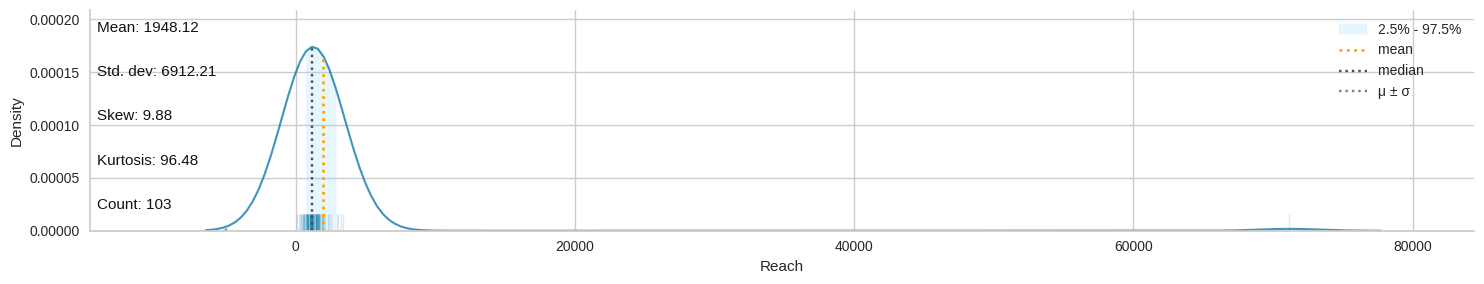

In [ ]:
klib.dist_plot(data['Reach']);

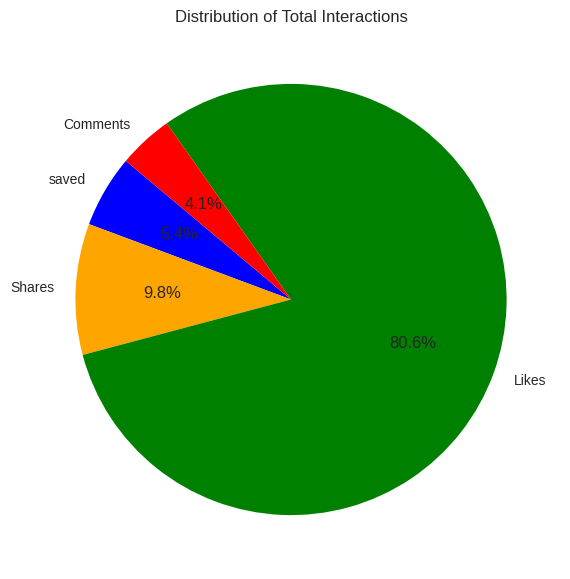

In [ ]:
sums = data[['saved', 'Shares', 'Likes', 'Comments']].sum()

plt.figure(figsize=(7, 7))
plt.pie(sums, labels=sums.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'orange', 'green', 'red'])
plt.title('Distribution of Total Interactions')
plt.show()

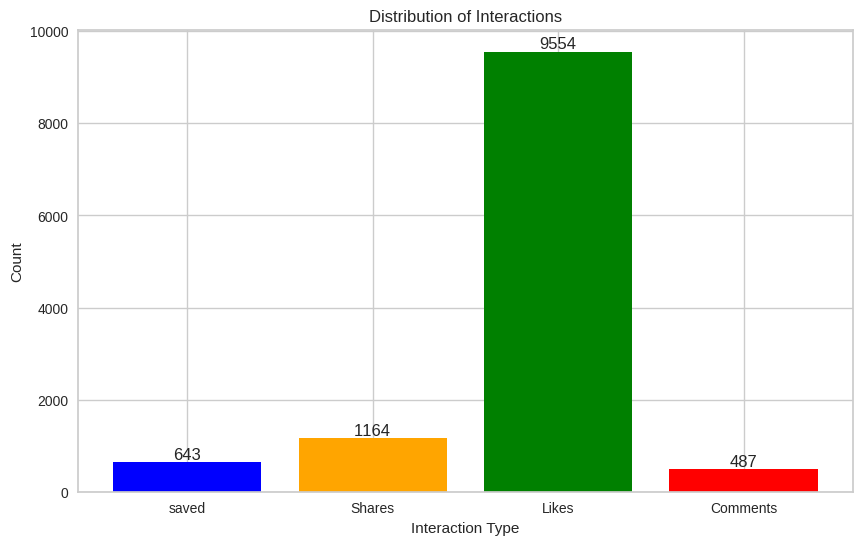

In [ ]:

plt.figure(figsize=(10, 6))
bars = plt.bar(sums.index, sums.values, color=['blue', 'orange', 'green', 'red'])
plt.title('Distribution of Interactions')
plt.xlabel('Interaction Type')
plt.ylabel('Count')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.show()


In [ ]:
correlation = data[['Reach','saved', 'Shares', 'Likes', 'Comments']].corr()

print(correlation["Reach"].sort_values(ascending=False))

Reach       1.000000
saved       0.996401
Shares      0.985439
Likes       0.979013
Comments    0.364815
Name: Reach, dtype: float64


In [ ]:
correlation

,Reach,saved,Shares,Likes,Comments
Reach,1.000000,0.996401,0.985439,0.979013,0.364815
saved,0.996401,1.000000,0.988030,0.969157,0.352407
Shares,0.985439,0.988030,1.000000,0.967090,0.374643
Likes,0.979013,0.969157,0.967090,1.000000,0.448494
Comments,0.364815,0.352407,0.374643,0.448494,1.000000


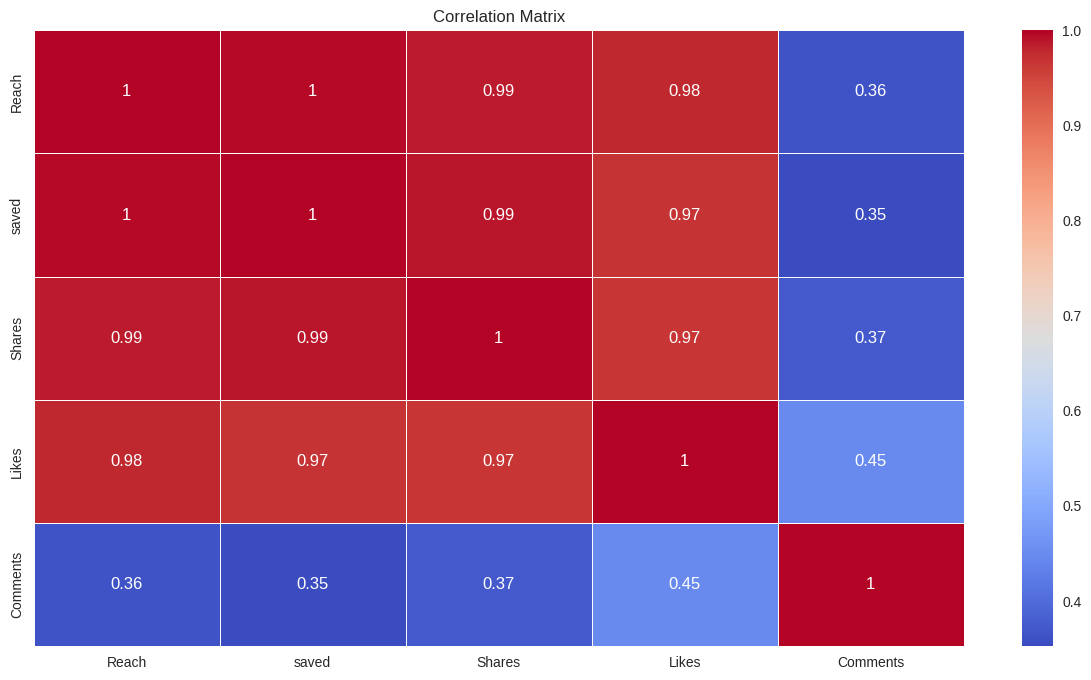

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

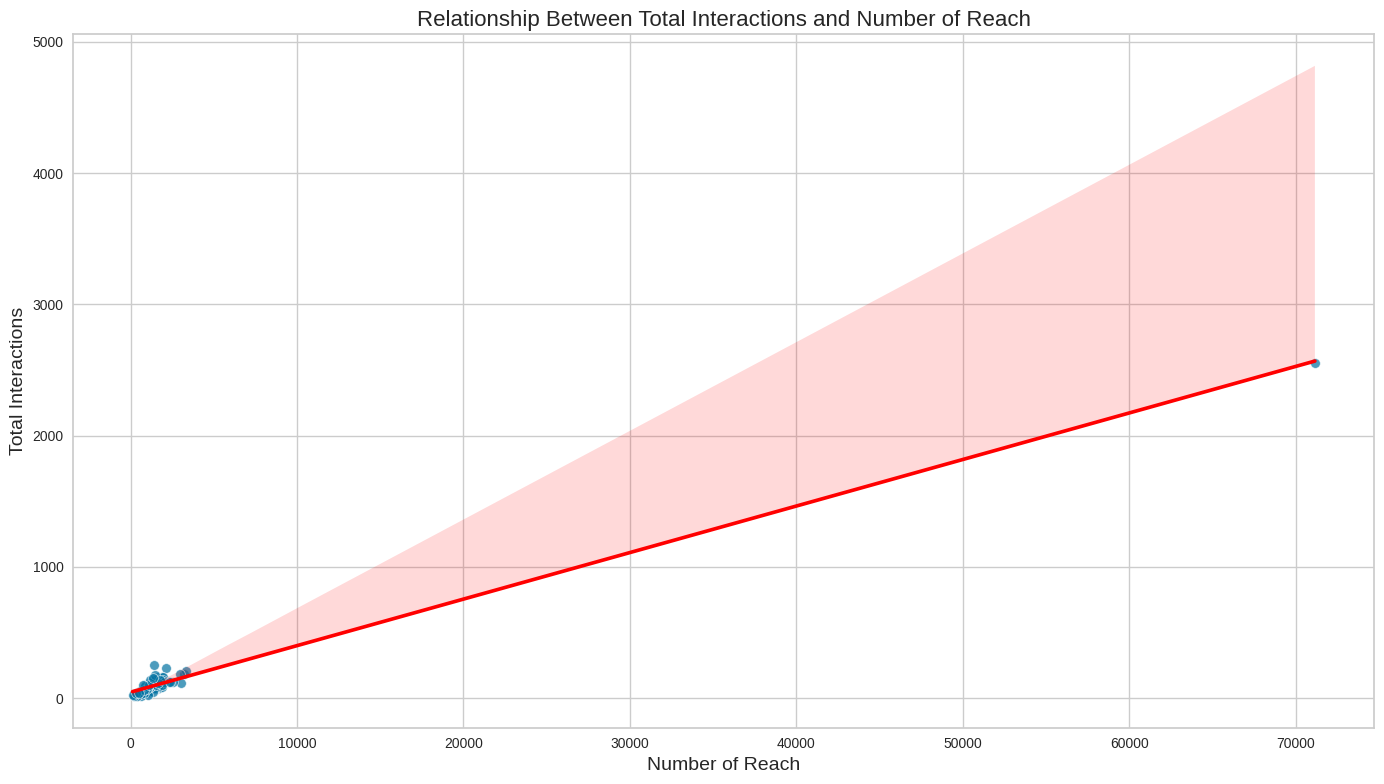

In [ ]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Reach', y='Total Interactions', data=data, alpha=0.7)
sns.regplot(x='Reach', y='Total Interactions', data=data, scatter=False, color='red')
plt.title('Relationship Between Total Interactions and Number of Reach', fontsize=16)
plt.xlabel('Number of Reach', fontsize=14)
plt.ylabel('Total Interactions', fontsize=14)
plt.tight_layout()
plt.show()

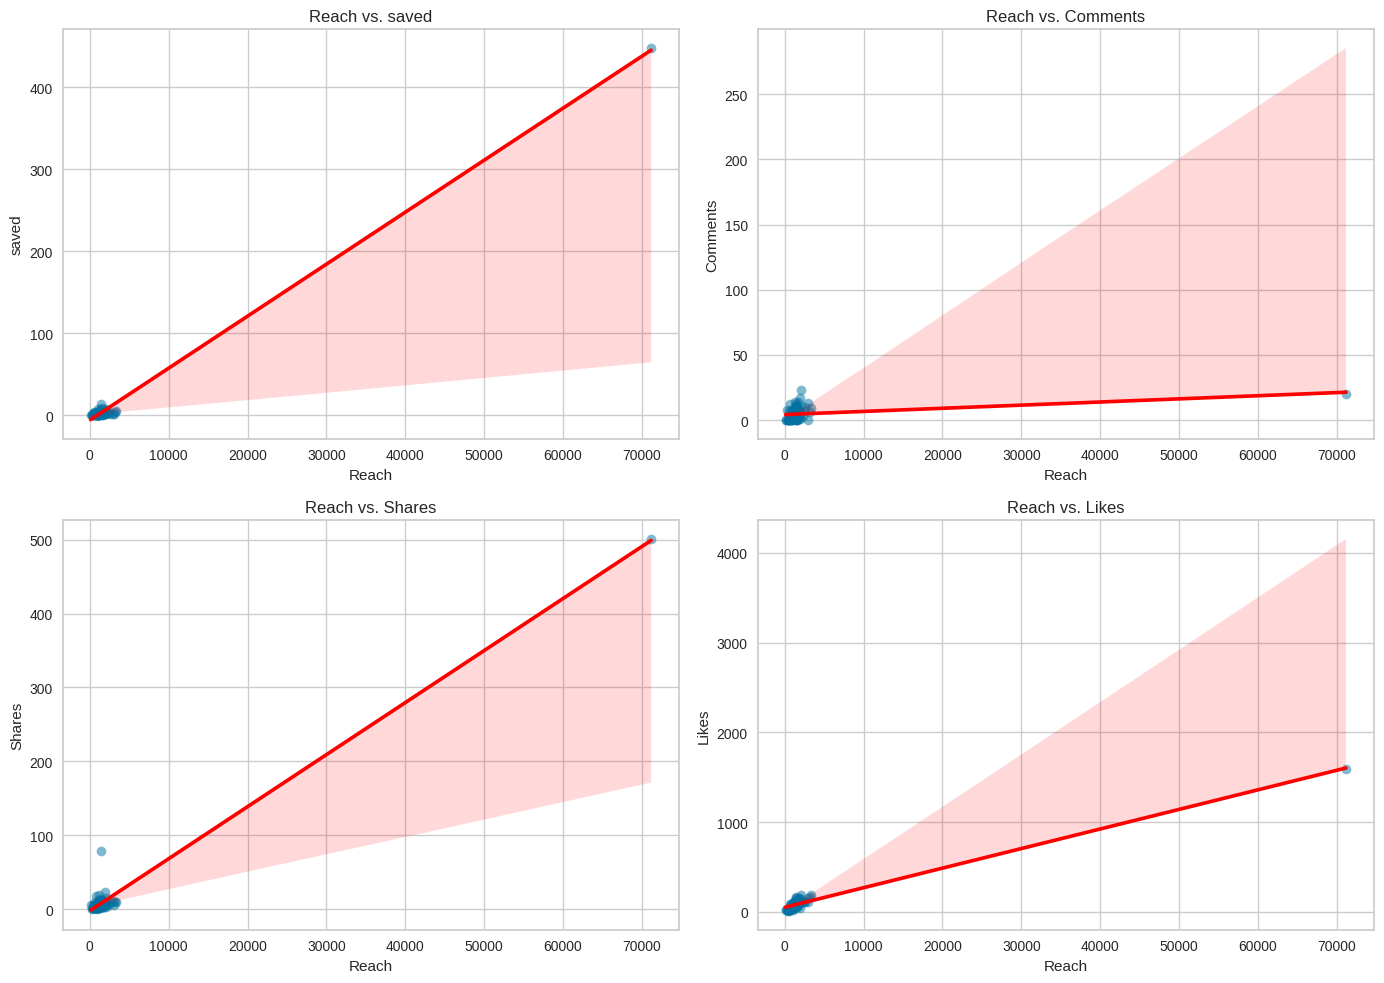

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.regplot(ax=axs[0, 0], x='Reach', y='saved', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[0, 0].set_xlabel('Reach')
axs[0, 0].set_ylabel('saved')
axs[0, 0].set_title('Reach vs. saved')

sns.regplot(ax=axs[0, 1], x='Reach', y='Comments', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[0, 1].set_xlabel('Reach')
axs[0, 1].set_ylabel('Comments')
axs[0, 1].set_title('Reach vs. Comments')

sns.regplot(ax=axs[1, 0], x='Reach', y='Shares', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[1, 0].set_xlabel('Reach')
axs[1, 0].set_ylabel('Shares')
axs[1, 0].set_title('Reach vs. Shares')

sns.regplot(ax=axs[1, 1], x='Reach', y='Likes', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axs[1, 1].set_xlabel('Reach')
axs[1, 1].set_ylabel('Likes')
axs[1, 1].set_title('Reach vs. Likes')

plt.tight_layout()
plt.show()

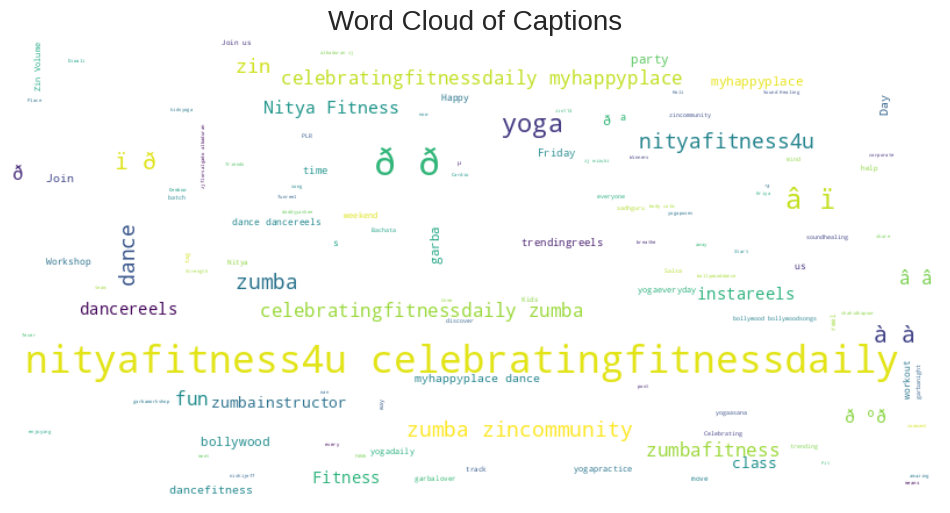

In [ ]:
from wordcloud import WordCloud, STOPWORDS

text = " ".join(str(caption) for caption in data['Caption'])
stopwords = set(STOPWORDS)

wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      width=800,
                      height=400,
                      max_words=200,
                      colormap='viridis',
                      contour_color='steelblue',
                      contour_width=2).generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Captions', fontsize=20)
plt.show()

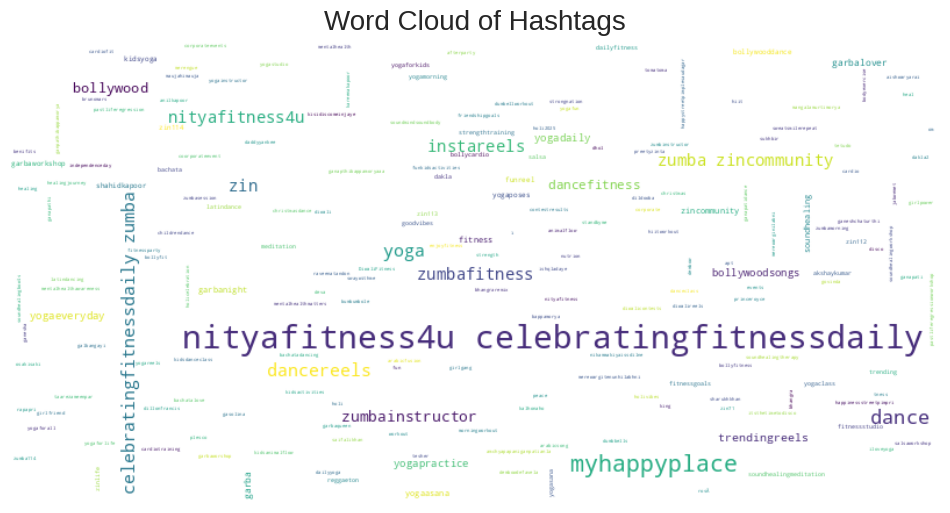

In [ ]:
text = " ".join(str(hashtag) for hashtags in data['Hashtags'].dropna() for hashtag in hashtags.split())  # Ensure all hashtags are properly split
stopwords = set(STOPWORDS)


wordcloud = WordCloud(stopwords=stopwords,
                      background_color='white',
                      width=800,
                      height=400,
                      max_words=200,
                      colormap='viridis',
                      contour_color='steelblue',
                      contour_width=2).generate(text)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hashtags', fontsize=20)
plt.show()

In [ ]:
from collections import Counter

def extract_hashtags(caption):
    return [tag.strip("#") for tag in caption.split() if tag.startswith("#")]

data['Hashtags List'] = data['Hashtags'].apply(lambda x: extract_hashtags(str(x)))

all_hashtags = [hashtag for hashtags in data['Hashtags List'] for hashtag in hashtags]
hashtag_counts = Counter(all_hashtags)

hashtag_usage_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count'])

hashtag_usage_df = hashtag_usage_df.sort_values(by='Count', ascending=False)

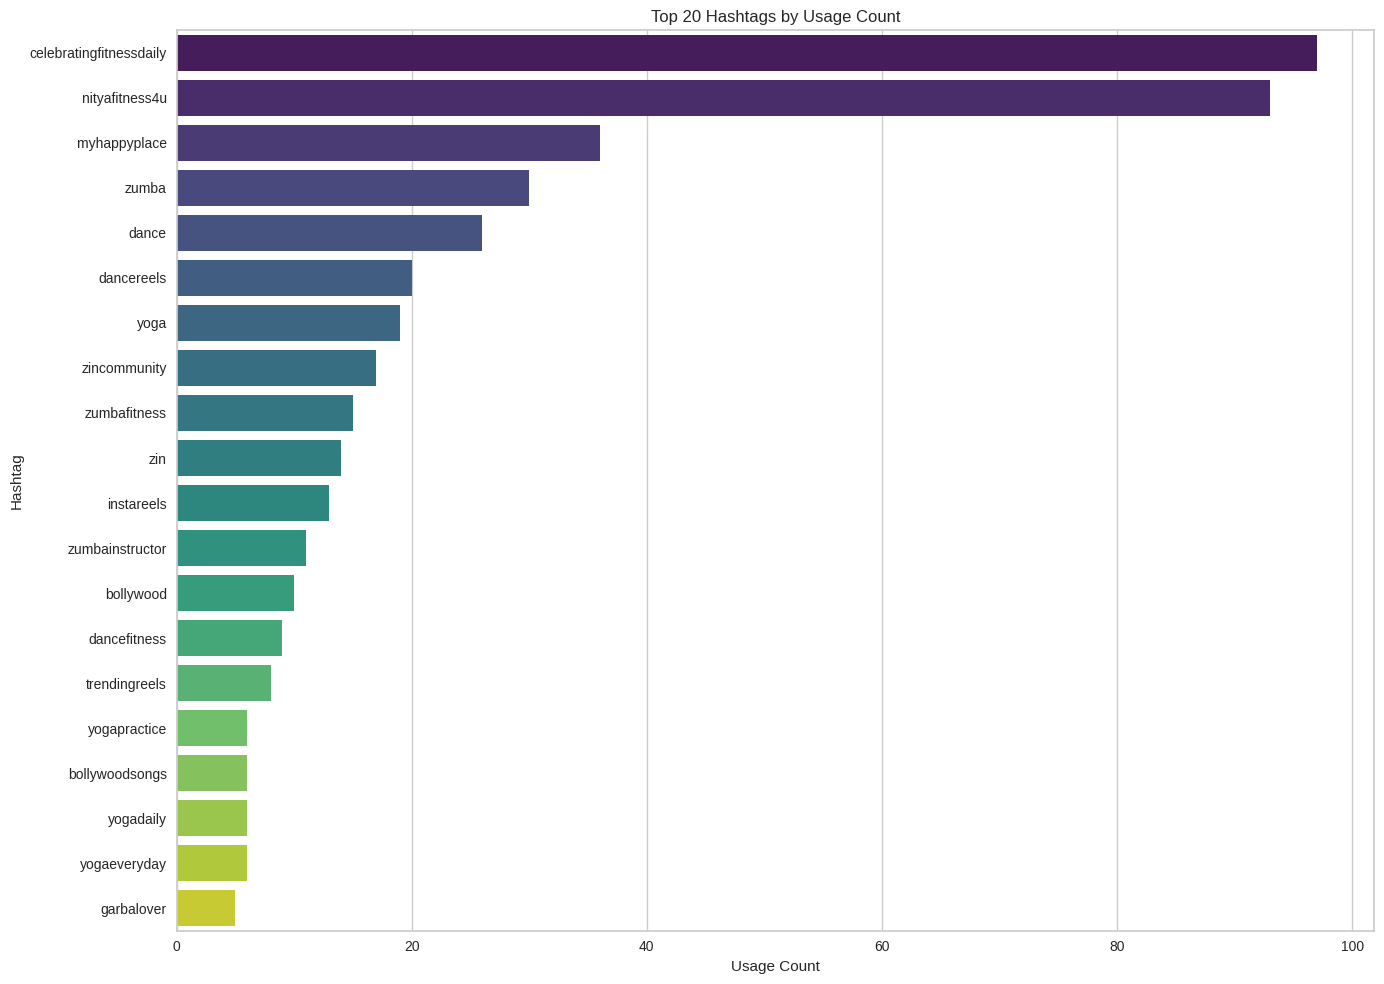

In [ ]:
plt.figure(figsize=(14, 10))

top_n = 20
top_hashtags = hashtag_usage_df.head(top_n)
sns.barplot(x='Count', y='Hashtag', data=top_hashtags, palette='viridis')
plt.title(f'Top {top_n} Hashtags by Usage Count')
plt.xlabel('Usage Count')
plt.ylabel('Hashtag')
plt.tight_layout()
plt.show()

In [ ]:
threshold = data['Reach'].median()
data['high_reach'] = (data['Reach'] > threshold).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[['Likes', 'Comments', 'Shares', 'saved']]
y = data['high_reach']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7142857142857143
Confusion Matrix:
 [[7 4]
 [2 8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.67      0.80      0.73        10

    accuracy                           0.71        21
   macro avg       0.72      0.72      0.71        21
weighted avg       0.72      0.71      0.71        21



In [ ]:
import numpy as np

coeffs = model.coef_[0]
for feat, coef in zip(X.columns, coeffs):
    print(f"{feat}: {coef:.4f}")

Likes: 2.5218
Comments: 0.7056
Shares: 0.4232
saved: 0.3039


In [ ]:
!pip install pycaret

In [ ]:
for col in data.columns:
    if data[col].apply(lambda x: isinstance(x, list)).any():
        data[col] = data[col].apply(lambda x: tuple(x) if isinstance(x, list) else x)

In [ ]:
data.columns = data.columns.str.replace(' ', '_')

In [ ]:
from pycaret.classification import *

if 'Reach' in data.columns:
    df_pycaret = data.drop(columns=['Reach'])
else:
    df_pycaret = data.copy()

clf_setup = setup(
    data=df_pycaret,
    target='high_reach',
    session_id=42,
    normalize=True,
    feature_selection=False,
    verbose=False
)

print("\n--- PyCaret Model Comparison ---")
best_model = compare_models()
evaluate_model(best_model)



--- PyCaret Model Comparison ---


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.7250,0.8375,0.7500,0.8105,0.7279,0.4672,0.5029,0.1080
lr,Logistic Regression,0.7214,0.8417,0.7000,0.6750,0.6770,0.4568,0.4747,0.1890
knn,K Neighbors Classifier,0.6357,0.7573,0.5917,0.6950,0.5621,0.3211,0.3948,0.2130
et,Extra Trees Classifier,0.5250,0.8115,0.1750,0.2150,0.1750,0.0787,0.0880,0.2250
nb,Naive Bayes,0.5125,0.5125,0.1000,0.0571,0.0727,0.0250,0.0378,0.1740
xgboost,Extreme Gradient Boosting,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1330
lightgbm,Light Gradient Boosting Machine,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2480
ridge,Ridge Classifier,0.4964,0.6188,0.5333,0.4824,0.4421,0.0791,0.1041,0.1070
qda,Quadratic Discriminant Analysis,0.4839,0.2698,0.4000,0.2000,0.2655,-0.0046,-0.0093,0.1080
rf,Random Forest Classifier,0.4821,0.8802,0.4500,0.2786,0.3133,0.0722,0.0931,0.2630


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…